In [1]:
# install tflite model maker
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 642 kB 10.4 MB/s 
     |████████████████████████████████| 6.4 MB 47.4 MB/s 
     |████████████████████████████████| 237 kB 38.5 MB/s 
     |████████████████████████████████| 42.5 MB 1.5 MB/s 
     |████████████████████████████████| 1.1 MB 43.3 MB/s 
     |████████████████████████████████| 10.9 MB 32.1 MB/s 
     |████████████████████████████████| 840 kB 41.9 MB/s 
     |████████████████████████████████| 77 kB 3.8 MB/s 
     |████████████████████████████████| 120 kB 62.6 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 3.4 MB 39.4 MB/s 
     |████████████████████████████████| 596 kB 49.7 MB/s 
     |████████████████████████████████| 1.2 MB 50.8 MB/s 
     |████████████████████████████████| 25.3 MB 1.6 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |██████████████████████████████

In [2]:
# install libportaudio2
!sudo apt-get install libportaudio2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [3]:
# import libraries needed
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

from tflite_model_maker import model_spec
from tflite_model_maker.config import QuantizationConfig

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# checking amount of data in each label
print("Daun Jambu Biji: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Jambu Biji")))
print("Daun Kari: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Kari")))
print("Daun Kemangi: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Kemangi")))
print("Daun Kunyit: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Kunyit")))
print("Daun Mint: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Mint")))
print("Daun Pepaya: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Pepaya")))
print("Daun Sirih: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Sirih")))
print("Daun Sirsak: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Daun Sirsak")))
print("Lidah Buaya: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Lidah Buaya")))
print("Teh Hijau: ", len(os.listdir("/content/drive/MyDrive/dataset/Tanaman Herbal/Teh Hijau")))

Daun Jambu Biji:  130
Daun Kari:  130
Daun Kemangi:  130
Daun Kunyit:  136
Daun Mint:  123
Daun Pepaya:  133
Daun Sirih:  130
Daun Sirsak:  136
Lidah Buaya:  130
Teh Hijau:  122


In [8]:
# load the dataset and split it into train, validation and test dataset with 8:1:1 ratio
data = DataLoader.from_folder('/content/drive/MyDrive/dataset/Tanaman Herbal')
train_dataset, x = data.split(0.8)
validation_dataset, test_dataset = x.split(0.5)

INFO:tensorflow:Load image with size: 1300, num_label: 10, labels: Daun Jambu Biji, Daun Kari, Daun Kemangi, Daun Kunyit, Daun Mint, Daun Pepaya, Daun Sirih, Daun Sirsak, Lidah Buaya, Teh Hijau.


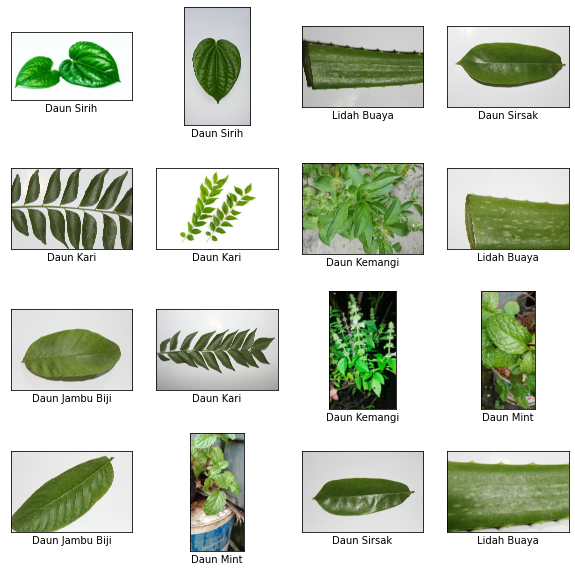

In [9]:
# display some image examples from dataset
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(16)):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [19]:
# adding augmentation to increase model accuracy
augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",
                                                                              input_shape=(224, 224, 3)),
                                 layers.experimental.preprocessing.RandomRotation(0.1),
                                 layers.experimental.preprocessing.RandomZoom(0.1),
                                 layers.experimental.preprocessing.Rescaling(1/255.)
                                 ])                

In [11]:
# define the transfer learning model with MobileNetV2 CNN architecture
model = image_classifier.create(train_dataset,
                                model_spec='mobilenet_v2',
                                validation_data=validation_dataset,
                                batch_size=32,
                                epochs=50,
                                dropout_rate=0.2,
                                learning_rate=0.0001,
                                momentum=0.9,
                                shuffle=1000,
                                use_augmentation=augmentation)

INFO:tensorflow:Retraining the models...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             2257984   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 468s 14s/step - loss: 2.6153 - accuracy: 0.0938 - val_loss: 2.2380 - val_accuracy: 0.2000
Epoch 2/50
32/32 [==============================] - 193s 6s/step - loss: 2.3454 - accuracy: 0.1631 - val_loss: 1.9750 - val_accuracy: 0.2923
Epoch 3/50
32/32 [==============================] - 189s 6s/step - loss: 2.1217 - accuracy: 0.2461 - val_loss: 1.7809 - val_accuracy: 0.4154
Epoch 4/50
32/32 [==============================] - 197s 6s/step - loss: 2.0093 - accuracy: 0.3184 - val_loss: 1.6149 - val_accuracy: 0.5692
Epoch 5/50
32/32 [==============================] - 191s 6s/step - loss: 1.8319 - accuracy: 0.4258 - val_loss: 1.4802 - val_accuracy: 0.6538
Epoch 6/50
32/32 [==============================] - 191s 6s/step - loss: 1.7028 - accuracy: 0.4795 - val_loss: 1.3666 - val_accuracy: 0.7154
Epoch 7/50
32/32 [==============================] - 197s 6s/step - loss: 1.6304 - accuracy: 0.5186 - val_loss: 1.2738 - val_accuracy: 0.7769
Epoch 8/50
32/32 [=====

In [12]:
# evaluate the test_dataset
loss, accuracy = model.evaluate(test_dataset)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


5/5 [==============================] - 113s 7s/step - loss: 0.7500 - accuracy: 0.9308


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


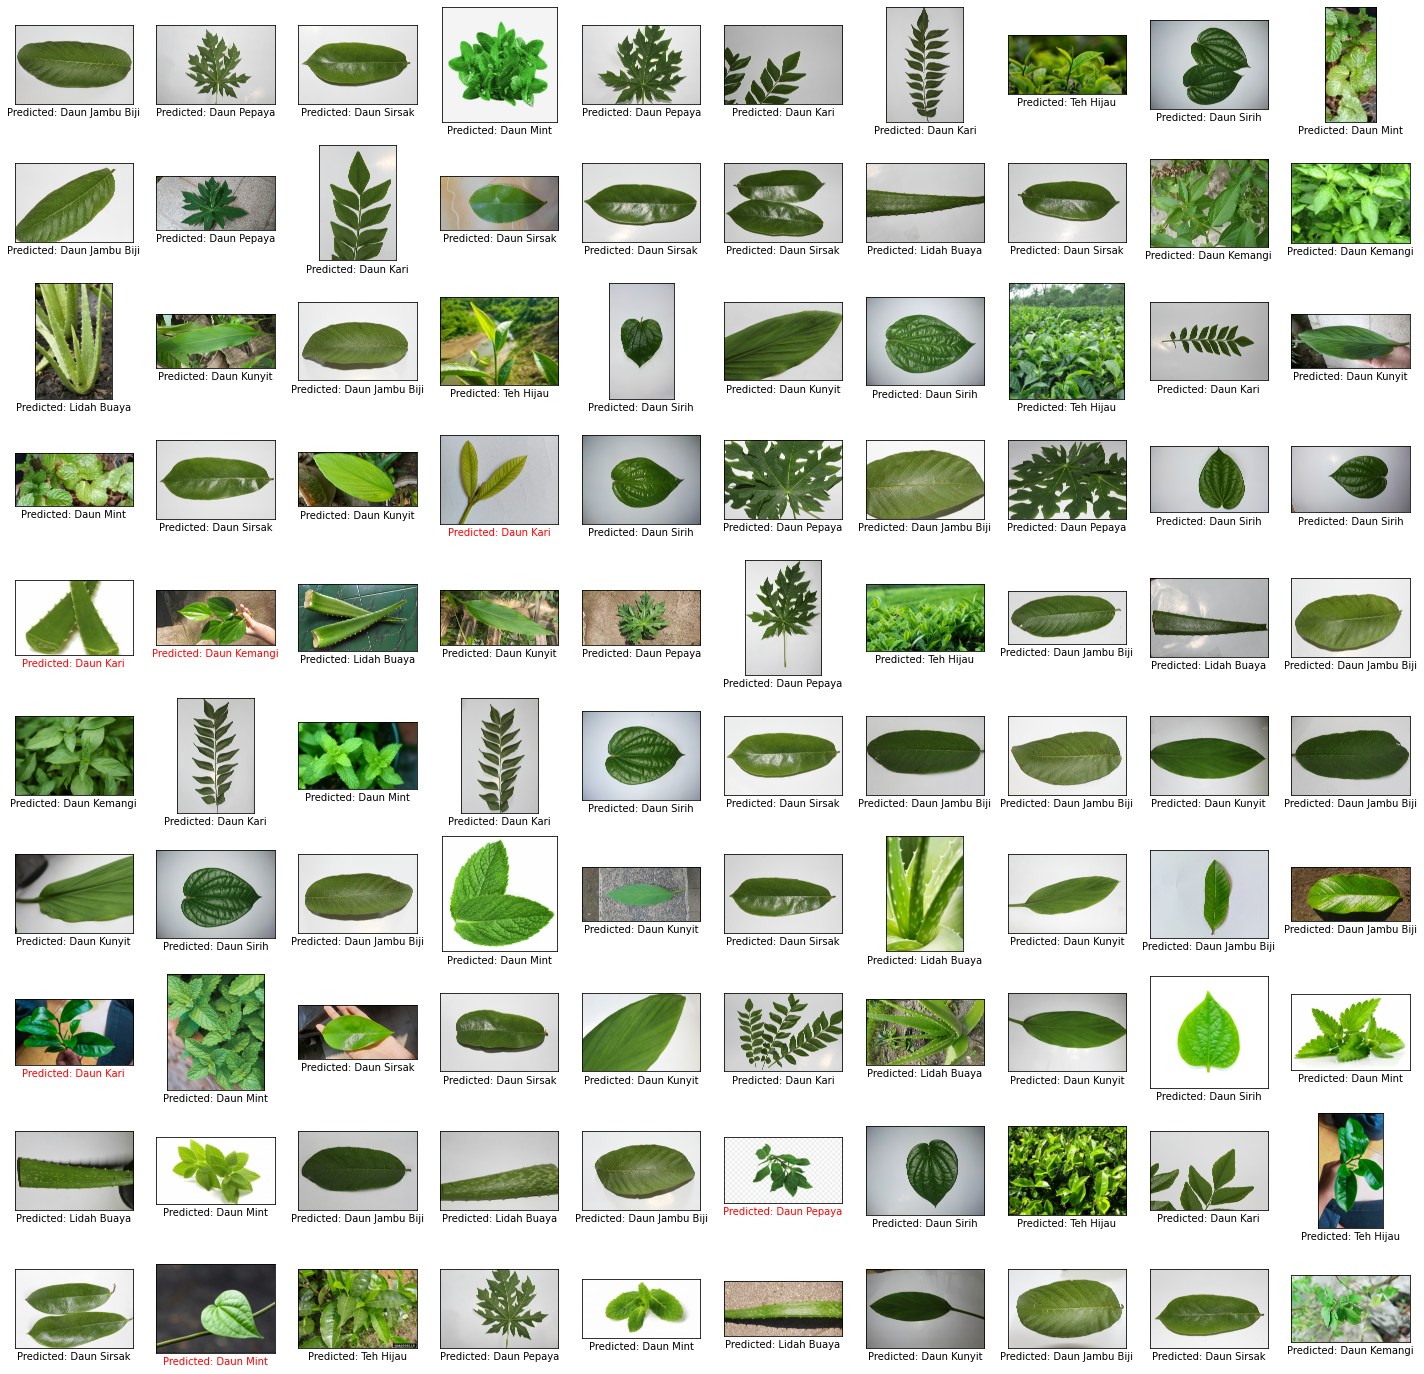

In [13]:
# define function to return black=True and red=False in prediction result
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# display 100 test images and their predicted labels
plt.figure(figsize=(25, 25))
predicts = model.predict_top_k(test_dataset)
for i, (image, label) in enumerate(test_dataset.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_dataset.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [24]:
# adding some augmentation again to increase model accuracy
augmentation1 = keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",
                                                                              input_shape=(224, 224, 3)),
                                 layers.experimental.preprocessing.RandomRotation(0.1),
                                 layers.experimental.preprocessing.RandomZoom(0.1),
                                 layers.experimental.preprocessing.Rescaling(1/255.),
                                 layers.experimental.preprocessing.RandomContrast(factor=0.1),
                                 layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode="wrap"),
                                 layers.experimental.preprocessing.RandomHeight(factor=0.1)
                                 ])                

In [25]:
# retrain again the transfer learning model1 with MobileNetV2 CNN architecture and change the batch size to 16
model1 = image_classifier.create(train_dataset,
                                model_spec='mobilenet_v2',
                                validation_data=validation_dataset,
                                batch_size=16,
                                epochs=50,
                                dropout_rate=0.2,
                                learning_rate=0.0001,
                                momentum=0.9,
                                shuffle=1000,
                                use_augmentation=augmentation1)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             2257984   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
65/65 [==============================] - 226s 3s/step - loss: 2.6470 - accuracy: 0.1125 - val_loss: 2.1945 - val_accuracy: 0.3154
Epoch 2/50
65/65 [==============================] - 211s 3s/step - loss: 2.1809 - accuracy: 0.2500 - val_loss: 1.7772 - val_accuracy: 0.4846
Epoch 3/50
65/65 [==============================] - 213s 3s/step - loss: 1.8701 - accuracy: 0.3894 - val_loss: 1.4892 - val_accuracy: 0.6308
Epoch 4/50
65/65 [==============================] - 207s 3s/step - loss: 1.5923 - accuracy: 0.5356 - val_loss: 1.2915 - val_accuracy: 0.7462
Epoch 5/50
65/65 [==============================] - 196s 3s/step - loss: 1.4338 - accuracy: 0.6183 - val_loss: 1.1560 - val_accuracy: 0.8154
Epoch 6/50
65/65 [==============================] - 199s 3s/step - loss: 1.3326 - accuracy: 0.6779 - val_loss: 1.0625 - val_accuracy: 0.8462
Epoch 7/50
65/65 [==============================] - 191s 3s/step - loss: 1.2573 - accuracy: 0.7135 - val_loss: 1.0014 - val_accuracy: 0.8692
Epoch 8/50
65

In [26]:
# evaluate the test_dataset
loss, accuracy = model1.evaluate(test_dataset)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


5/5 [==============================] - 105s 2s/step - loss: 0.6975 - accuracy: 0.9615


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


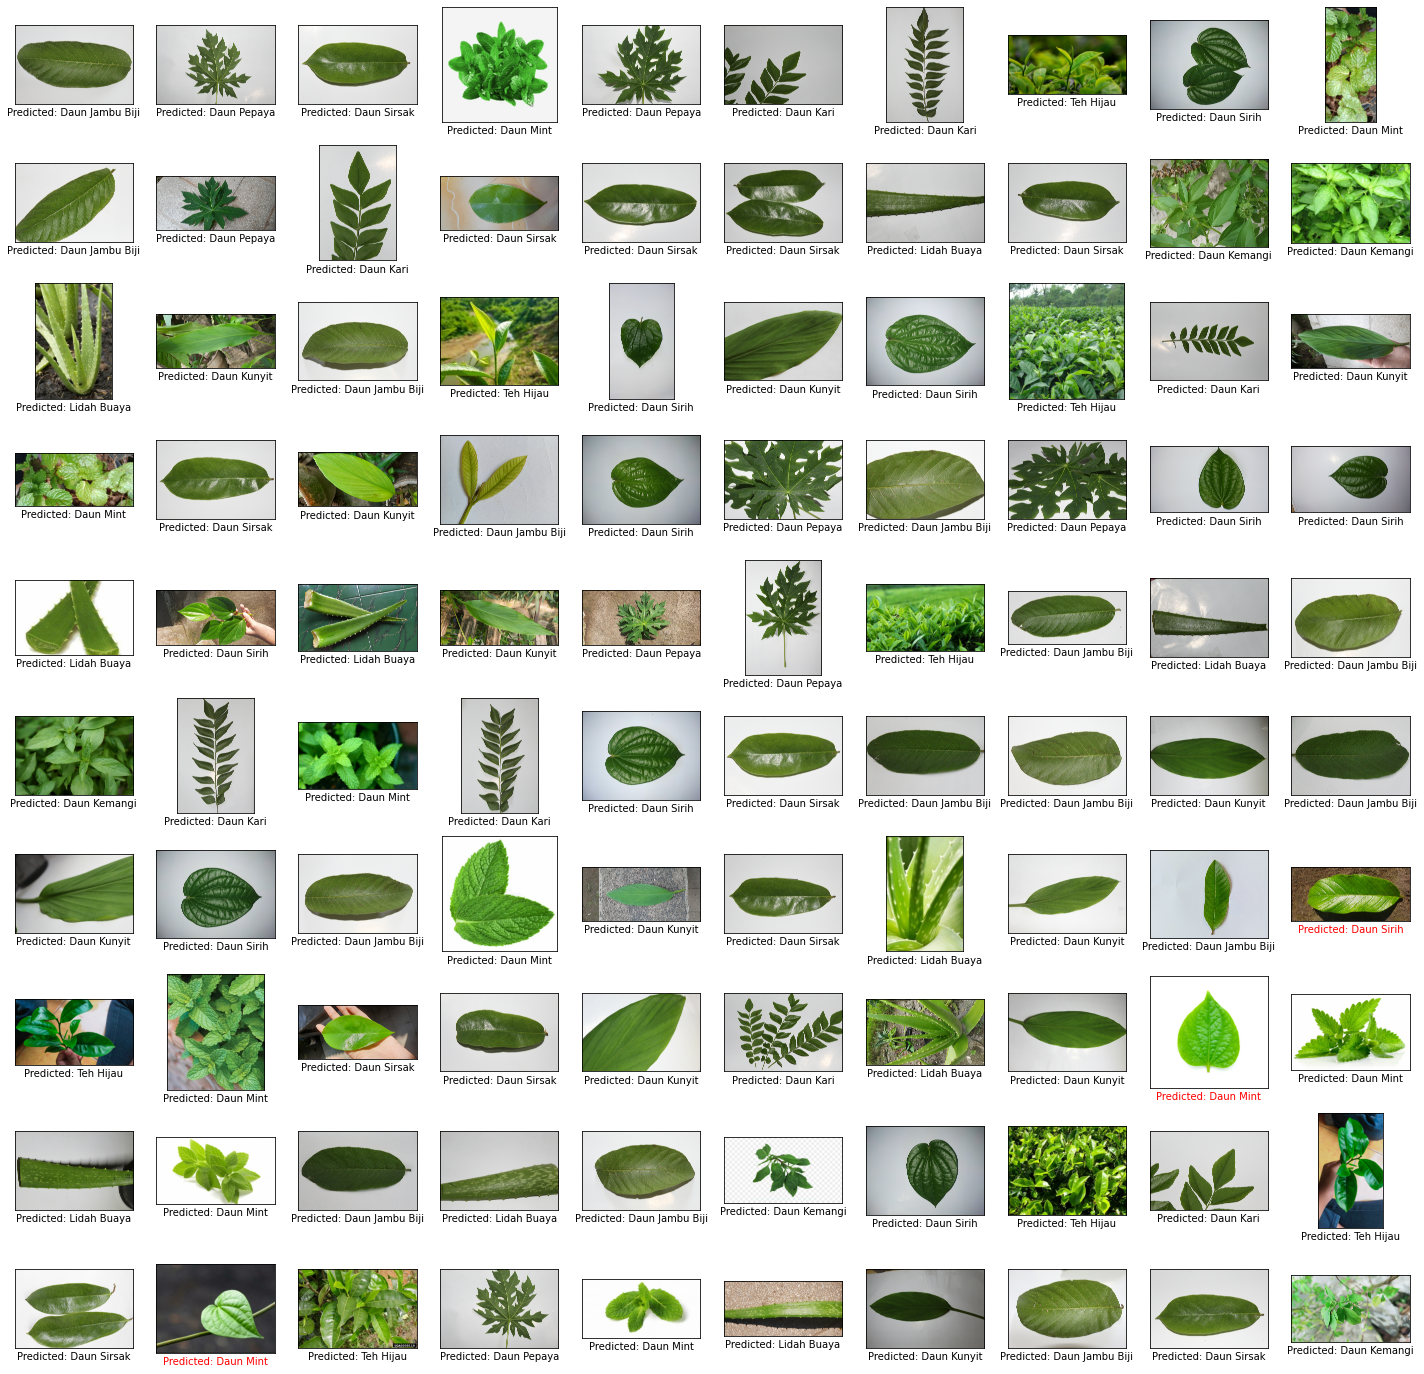

In [27]:
# define function to return black=True and red=False in prediction result
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# display 100 test images and their predicted labels
plt.figure(figsize=(25, 25))
predicts = model1.predict_top_k(test_dataset)
for i, (image, label) in enumerate(test_dataset.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_dataset.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [29]:
# post training quantization to reduce model size and inference latency
config = QuantizationConfig.for_float16()

In [30]:
# export the TensorFlow Lite model
model1.export(export_dir='paranmo', tflite_filename='BestModelParanmo.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpbsqwu7j7/assets


INFO:tensorflow:Assets written to: /tmp/tmpbsqwu7j7/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpqx85btrc/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpqx85btrc/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: paranmo/BestModelParanmo.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: paranmo/BestModelParanmo.tflite


In [31]:
# evaluate the tflite model with the evaluate_tflite method
model1.evaluate_tflite('paranmo/BestModelParanmo.tflite', test_dataset)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.9538461538461539}

In [32]:
# download the tflite file
try:
    from google.colab import files
    files.download('paranmo/BestModelParanmo.tflite')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>